In [1]:
%load_ext autoreload
%autoreload 2

In [69]:
from pgen import utils
from pgen import hmmer
from pathlib import Path
import matplotlib.pyplot as plt
common_vars = utils.CommonVars()
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [10]:
common_vars

{'app': 'PGEN', 'workspace': '/workspace', 'project_dir': '/workspace', 'data_dir': '/workspace/data', 'logs_dir': '/workspace/logs'}

In [12]:
HMM_paths = {"CM_2": Path(common_vars.project_dir) / "data"/ "CM_2.hmm", "Tautomerase": Path(common_vars.project_dir) / "data"/ "Tautomerase.hmm"}

In [110]:
HMM_tests = [("CM2_Trn","data/Russ_994_random.fasta","CM_2"),
("Russ","outputs/models/russ/russ_gen.fasta","CM_2"),
("CM2_Tst","data/Russ_226_random.fasta","CM_2"),
("Tau_Tst","data/tautomerase_738.fasta","CM_2"),
("1_S","outputs/models/ESM34/esm34_CH_2_e_coli_full_sequential_k0.fasta","CM_2"),
("1_R","outputs/models/ESM34/E_coli_parallel_esm34.fasta","CM_2"),
("1_B","outputs/models/ESM34/E_coli_parallel_burnin_esm34.fasta","CM_2"),
("1_C","outputs/models/ESM34/E_coli_CM2_first_20_2549bd_trial1.fasta","CM_2"),
("1_N","outputs/models/ESM34/NoSeed_2549bd_trial2.fasta","CM_2"),
("2_B","outputs/models/esm1_t12_85M_UR50S/E_coli_parallel_burnin_esm12.fasta","CM_2"),
("3_B","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_6b9c30_trial5.fasta","CM_2"),
("3_C","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta","CM_2"),
("3_N","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/NoSeed_83abbe_trial2.fasta","CM_2"),
("4_B","outputs/models/esm1_t12_85M_UR50S/finetuned/tautomerase_2953/Dec04_14-13-14_c8588459/generated_sequences/E_coli_CM2_bb1f59_trial5.fasta","CM_2"),
("5_B","Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta","CM_2"),
("8_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","CM_2"),
#("9_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_300_epochs_no_seed.fasta","CM_2"),
("6_N","outputs/models/3_gram_CM_2/Russ_994_random_3gram_generation_seed_s_len92.fasta","CM_2"),
("HMM","outputs/models/hmmemit/CM_2_hmmemit.fasta","CM_2"),
("Tau_Tst","data/tautomerase_738.fasta","Tautomerase"),
("4_B","outputs/models/esm1_t12_85M_UR50S/finetuned/tautomerase_2953/Dec04_14-13-14_c8588459/generated_sequences/E_coli_CM2_bb1f59_trial5.fasta","Tautomerase"),
("4_N","outputs/models/esm1_t12_85M_UR50S/finetuned/tautomerase_2953/Dec04_14-13-14_c8588459/generated_sequences/NoSeed_30995f_trial2.fasta","Tautomerase"),
("7_N","outputs/models/3_gram_Tautomerase/tautomerase_2953_3gram_generation_seed_s_len60.fasta","Tautomerase")]

# HMM_tests = [("5_B","Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta","CM_2"),
             
# ("8_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","CM_2"),
# ("3_N","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/NoSeed_83abbe_trial2.fasta","CM_2"),
# ]

In [111]:
hmm_results = list()
for t in HMM_tests:
    print(t[0])
    out = hmmer.get_hmm_scores(HMM_paths[t[2]], utils.parse_fasta(Path(common_vars.project_dir) / t[1]))
    hmm_results.append((t[0],t[2], out))

CM2_Trn
Russ
CM2_Tst
Tau_Tst
1_S
1_R
1_B
1_C
1_N
2_B
3_B
3_C
3_N
4_B
5_B
8_N
6_N
HMM
Tau_Tst
4_B
4_N
7_N


In [112]:
df = pd.DataFrame()
scores = list()
datasets = list()
for i,v in enumerate(hmm_results):
    T=""
    if v[1] == "Tautomerase":
        T="*"
    scores += v[2]
    datasets += [v[0] + T] * len(v[2])
df["Dataset"] = datasets
df["HMM Score"] = scores

In [75]:
df

,Dataset,HMM Score
0,CM2_Trn,82.7
1,CM2_Trn,57.1
2,CM2_Trn,74.2
3,CM2_Trn,43.2
4,CM2_Trn,76.5
...,...,...
6583,7_N*,0.0
6584,7_N*,0.0
6585,7_N*,0.0
6586,7_N*,0.0


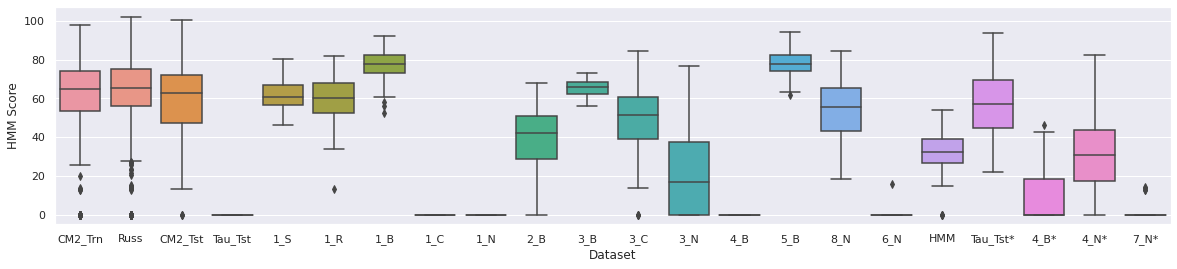

In [113]:
sns.set(rc={'figure.figsize':(20,4)})
#sns.set(rc={'figure.figsize':(5,4)})
ax = sns.boxplot(x="Dataset", y="HMM Score", data=df)

In [114]:
plt.savefig('hmm_plot.png')

<Figure size 1440x288 with 0 Axes>

In [116]:
!pwd
!ls

/workspace/src/tasks/evaluation
'Align to training data.ipynb'	 README.md	    hmm_plot.png
 GB1_fitness.ipynb		 hmm_graphs.ipynb   sequence_stats.ipynb


In [117]:
stats_comparison_datasets = [("CM2_Tst","data/Russ_226_random.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("Russ","outputs/models/russ/russ_gen.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("1_B","outputs/models/ESM34/E_coli_parallel_burnin_esm34.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("2_B","outputs/models/esm1_t12_85M_UR50S/E_coli_parallel_burnin_esm12.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("3_C","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("8_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("5_B","Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("HMM","outputs/models/hmmemit/CM_2_hmmemit.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("5_B","Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta","1_B","outputs/models/ESM34/E_coli_parallel_burnin_esm34.fasta")]


In [118]:
stats_comparisons = list()
for r in stats_comparison_datasets:
    print(r)
    stat_seqs = { r[0]: utils.parse_fasta(Path(common_vars.project_dir) / r[1]), r[2]:  utils.parse_fasta(Path(common_vars.project_dir) / r[3]) }
    aln_names, aln_seqs = utils.generate_alignment(stat_seqs, "/tmp")
    fos = utils.first_order_statistics(list(stat_seqs.keys()), aln_names, aln_seqs)
    sos = utils.second_order_statistics(list(stat_seqs.keys()), aln_names, aln_seqs)
    stats_comparisons.append((r[0],r[2],fos,sos))

('CM2_Tst', 'data/Russ_226_random.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
('Russ', 'outputs/models/russ/russ_gen.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
('1_B', 'outputs/models/ESM34/E_coli_parallel_burnin_esm34.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
('2_B', 'outputs/models/esm1_t12_85M_UR50S/E_coli_parallel_burnin_esm12.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
('3_C', 'outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
('8_N', 'Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
('5_B', 'Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
('HMM', 'outputs/models/hmmemit/CM_2_hmmemit.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
('5_B', 'Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta', '1_

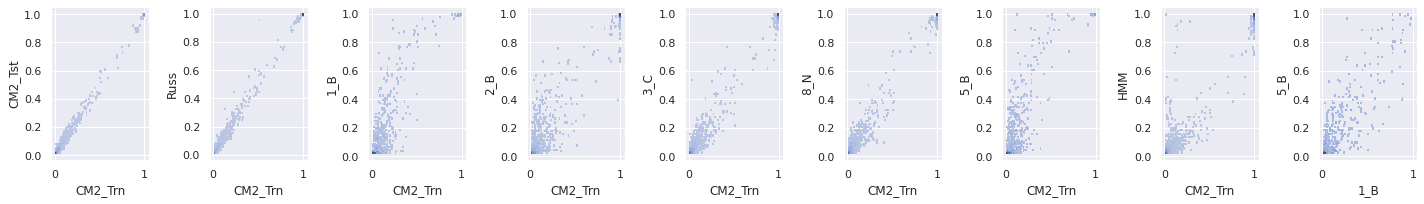

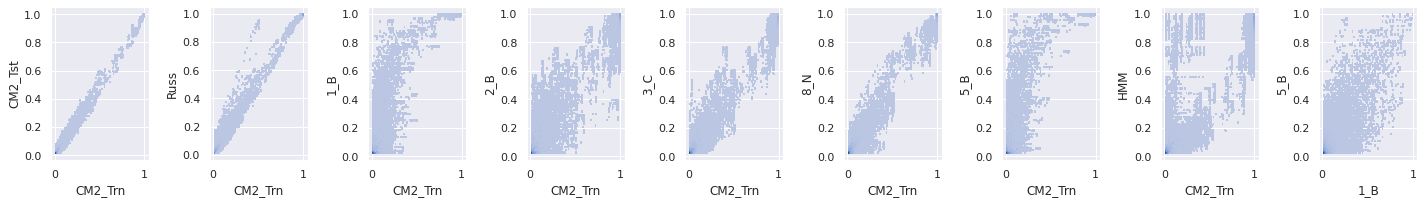

In [119]:
delta = 0.01
filtered = list()
fig_fos, axs_fos = plt.subplots(ncols=len(stats_comparisons),figsize=(20,3))
fig_sos, axs_sos = plt.subplots(ncols=len(stats_comparisons),figsize=(20,3))
for (i,r) in enumerate(stats_comparisons):
    fos = r[2][(r[2][r[0]] > delta) & (r[2][r[1]] > delta)]
    sos = r[3][(r[3][r[0]] > delta) & (r[3][r[1]] > delta)]
    filtered.append((r[0],r[1],fos,sos))
    sns.histplot(x=r[1], y=r[0], data=fos, binwidth=(0.01, .01), ax=axs_fos[i])
    sns.histplot(x=r[1], y=r[0], data=sos, binwidth=(0.01, .01), ax=axs_sos[i])
fig_fos.tight_layout()
fig_sos.tight_layout()


In [ ]:
stats_comparison_datasets = [("8_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("8_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","3_C","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta"),
]

stats_comparisons = list()
for r in stats_comparison_datasets:
    print(r)
    stat_seqs = { r[0]: utils.parse_fasta(Path(common_vars.project_dir) / r[1]), r[2]:  utils.parse_fasta(Path(common_vars.project_dir) / r[3]) }
    aln_names, aln_seqs = utils.generate_alignment(stat_seqs, "/tmp")
    fos = utils.first_order_statistics(list(stat_seqs.keys()), aln_names, aln_seqs)
    sos = utils.second_order_statistics(list(stat_seqs.keys()), aln_names, aln_seqs)
    stats_comparisons.append((r[0],r[2],fos,sos))
    

delta = 0.01
filtered = list()
fig_fos, axs_fos = plt.subplots(ncols=len(stats_comparisons),figsize=(8,3))
fig_sos, axs_sos = plt.subplots(ncols=len(stats_comparisons),figsize=(8,3))
for (i,r) in enumerate(stats_comparisons):
    fos = r[2][(r[2][r[0]] > delta) & (r[2][r[1]] > delta)]
    sos = r[3][(r[3][r[0]] > delta) & (r[3][r[1]] > delta)]
    filtered.append((r[0],r[1],fos,sos))
    sns.histplot(x=r[1], y=r[0], data=fos, binwidth=(0.01, .01), ax=axs_fos[i])
    sns.histplot(x=r[1], y=r[0], data=sos, binwidth=(0.01, .01), ax=axs_sos[i])
fig_fos.tight_layout()
fig_sos.tight_layout()

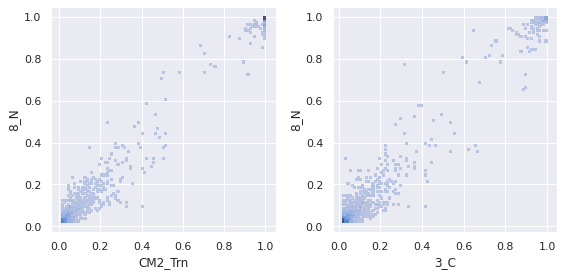

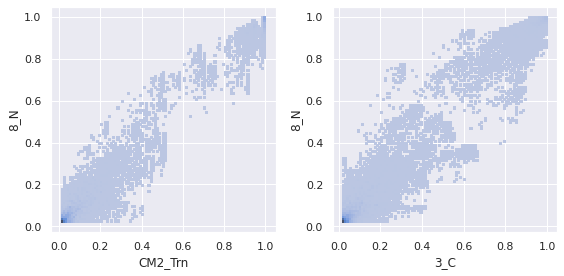

In [103]:
stats_comparison_datasets = [("8_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("8_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","3_C","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta"),
]

stats_comparisons = list()
for r in stats_comparison_datasets:
    print(r)
    stat_seqs = { r[0]: utils.parse_fasta(Path(common_vars.project_dir) / r[1]), r[2]:  utils.parse_fasta(Path(common_vars.project_dir) / r[3]) }
    aln_names, aln_seqs = utils.generate_alignment(stat_seqs, "/tmp")
    fos = utils.first_order_statistics(list(stat_seqs.keys()), aln_names, aln_seqs)
    sos = utils.second_order_statistics(list(stat_seqs.keys()), aln_names, aln_seqs)
    stats_comparisons.append((r[0],r[2],fos,sos))
    

delta = 0.01
filtered = list()
fig_fos, axs_fos = plt.subplots(ncols=len(stats_comparisons),figsize=(8,3))
fig_sos, axs_sos = plt.subplots(ncols=len(stats_comparisons),figsize=(8,3))
for (i,r) in enumerate(stats_comparisons):
    fos = r[2][(r[2][r[0]] > delta) & (r[2][r[1]] > delta)]
    sos = r[3][(r[3][r[0]] > delta) & (r[3][r[1]] > delta)]
    filtered.append((r[0],r[1],fos,sos))
    sns.histplot(x=r[1], y=r[0], data=fos, binwidth=(0.01, .01), ax=axs_fos[i])
    sns.histplot(x=r[1], y=r[0], data=sos, binwidth=(0.01, .01), ax=axs_sos[i])
fig_fos.tight_layout()
fig_sos.tight_layout()

('9_N', 'Outputs/models/ProtBert12-Russ/russ_from_scratch_300_epochs_no_seed.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
('9_N', 'Outputs/models/ProtBert12-Russ/russ_from_scratch_300_epochs_no_seed.fasta', '3_C', 'outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta')


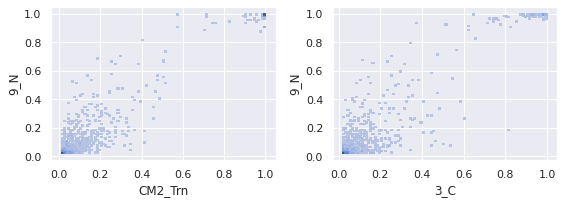

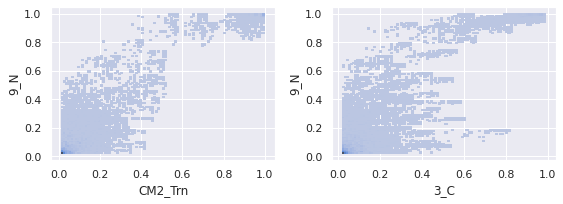

In [109]:
stats_comparison_datasets = [("9_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_300_epochs_no_seed.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("9_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_300_epochs_no_seed.fasta","3_C","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta"),
]

stats_comparisons = list()
for r in stats_comparison_datasets:
    print(r)
    stat_seqs = { r[0]: utils.parse_fasta(Path(common_vars.project_dir) / r[1]), r[2]:  utils.parse_fasta(Path(common_vars.project_dir) / r[3]) }
    aln_names, aln_seqs = utils.generate_alignment(stat_seqs, "/tmp")
    fos = utils.first_order_statistics(list(stat_seqs.keys()), aln_names, aln_seqs)
    sos = utils.second_order_statistics(list(stat_seqs.keys()), aln_names, aln_seqs)
    stats_comparisons.append((r[0],r[2],fos,sos))
    

delta = 0.01
filtered = list()
fig_fos, axs_fos = plt.subplots(ncols=len(stats_comparisons),figsize=(8,3))
fig_sos, axs_sos = plt.subplots(ncols=len(stats_comparisons),figsize=(8,3))
for (i,r) in enumerate(stats_comparisons):
    fos = r[2][(r[2][r[0]] > delta) & (r[2][r[1]] > delta)]
    sos = r[3][(r[3][r[0]] > delta) & (r[3][r[1]] > delta)]
    filtered.append((r[0],r[1],fos,sos))
    sns.histplot(x=r[1], y=r[0], data=fos, binwidth=(0.01, .01), ax=axs_fos[i])
    sns.histplot(x=r[1], y=r[0], data=sos, binwidth=(0.01, .01), ax=axs_sos[i])
fig_fos.tight_layout()
fig_sos.tight_layout()